In [70]:
fileName = "20201115.csv"
result = {}


r_cpu = {}
r_mem = {}
r_net_i = {}
r_net_o = {}
with open(fileName) as file:
    time = None
    containers = {}
    cpu = {}
    mem = {}
    net_i = {}
    net_o = {}
    for line in file.readlines():
        line = line.replace("\n","")
        if line.startswith("19:"):
            if len(containers) > 0:
                result[time] = dict(containers)
                containers = {}
                
                r_cpu[time] = dict(cpu)
                cpu = {}
                
                r_mem[time] = dict(mem)
                mem = {}
                
                r_net_i[time] = dict(net_i)
                net_i = {}
                
                r_net_o[time] = dict(net_o)
                net_o = {}
                
            time = line
        else:
            if not line.startswith("CONT"):
                some_list = list(filter(None, line.split('  ')))
                if some_list[1].find('.') != -1:
                    some_list[1] = some_list[1][0: some_list[1].find('.example')]
                some_list[3] = some_list[3][0: (some_list[3].find('/')-1)]
                
                network = some_list[5].split('/')
                some_list[5] = network[0]
                some_list[6] = network[1]
                
                del some_list[0]
                del some_list[2]
                del some_list[5]
                for i in range(0, len(some_list)):
                    some_list[i] = some_list[i].replace(" ", "")
                    if(type(some_list[i]) == type("a") and "%" in some_list[i]):
                        some_list[i] = float(some_list[i].replace("%", ""))
                    
                    if(type(some_list[i]) == type("a") and "kB" in some_list[i]):
                        some_list[i] = float(some_list[i].replace("kB", ""))
                        
                    if(type(some_list[i]) == type("a") and "MB" in some_list[i]):
                        some_list[i] = float(some_list[i].replace("MB", "")) * 1000
                        
                if some_list[0] == 'db':
                    some_list[0] = 'clair-db'
                if not some_list[0].startswith("ca") and some_list[0].find('queue') == -1 and some_list[0].find('anchore') == -1 and some_list[0].find('clair') == -1:
                    containers[some_list[0]] = {'CPU': some_list[1], 'MEM': some_list[2], 'NET I:': some_list[3], 'NET O:': some_list[4]}
                    
                    cpu[some_list[0]] = some_list[1]
                    mem[some_list[0]] = some_list[2]
                    net_i[some_list[0]] = some_list[3]
                    net_o[some_list[0]] = some_list[4]
            

22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.82
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.81
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.64
6.62
6.09
0.25
0.8
0.81
22.39
22.63
6.07
5.57
0.24
0.8
0.81
22.39
22.63
6.07
5.57
0.24
0.8
0.81
22.39
22.63
4.9
4.45
0.24
0.8
0.8
22.39
22.62
4.9
4.45
0.24
0.8
0.8
22.39
22.62
4.9
4.45
0.24
0.8
0.8
22.39
22.62
4.9
4.4

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df  = pd.DataFrame.from_dict(result);
df_cpu = pd.DataFrame.from_dict(r_cpu);
df_mem = pd.DataFrame.from_dict(r_mem);
df_net_i = pd.DataFrame.from_dict(r_net_i);
df_net_o = pd.DataFrame.from_dict(r_net_o);

c:\users\piotr\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


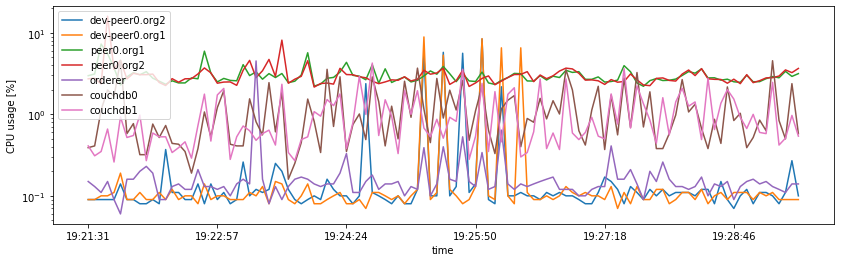

In [80]:
#print(df_cpu)
ax = df_cpu.T.plot(logy=True, figsize=(14,4))
ax.set_xlabel("time")
ax.set_ylabel("CPU usage [%]")
plt.legend(loc='best')
plt.savefig("cpu_usage.png")

c:\users\piotr\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


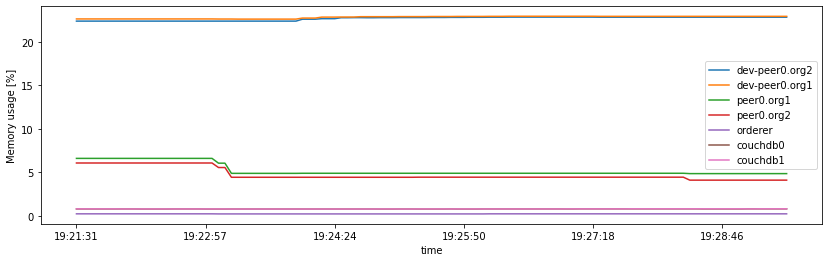

In [78]:
#print(df_mem)
ax = df_mem.T.plot(figsize=(14,4))
ax.set_xlabel("time")
ax.set_ylabel("Memory usage [%]")
plt.legend(loc='best')
plt.savefig("mem_usage.png")

c:\users\piotr\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


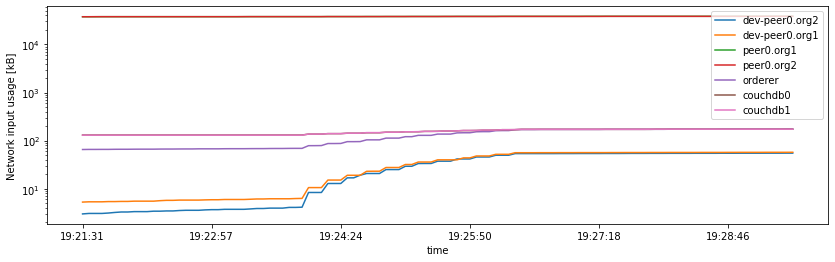

In [77]:
ax = df_net_i.T.plot(logy=True, figsize=(14,4))
ax.set_xlabel("time")
ax.set_ylabel("Network input usage [kB]")
plt.legend(loc='best')
plt.savefig("net_i_usage.png")

c:\users\piotr\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


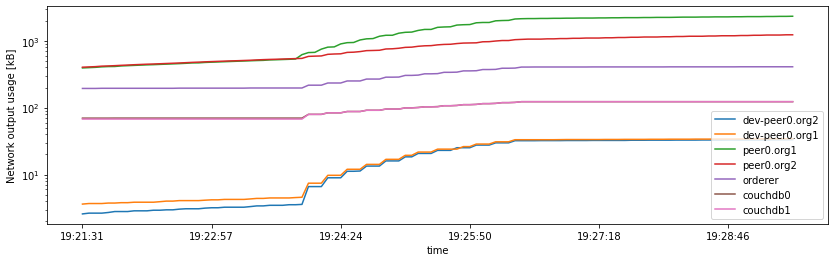

In [79]:
ax = df_net_o.T.plot(logy=True, figsize=(14,4))
ax.set_xlabel("time")
ax.set_ylabel("Network output usage [kB]")
plt.legend(loc='best')
plt.savefig("net_o_usage.png")